1er ejercicio numero de dataset 62
El nombre del dataset es Dataset for Link Phishing Detection
https://www.kaggle.com/datasets/winson13/dataset-for-link-phishing-detection/
Este dataset trata de indentificar si un URL es del tipo phishing o no dandonos a entender que es un dataset con una variable "Y" de dos tipos (legitimate o
phishing)
Sus variables de entrada son X (COLUNMA 3 AL 86) se desprecian las dos primeras colunmas por que contribuyen a la determinación de la Y.
y la entrada de la Y vendria a ser la (colunma 87).
Es un dataset de Regresión Logística o también llamada Clasificación.



In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
from matplotlib import pyplot
from scipy import optimize
%matplotlib inline

*En* este primer bloque de código, se importan las librerías necesarias para la realización del modelo.

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


AquÍ fue lo que hizo fue importacion de los dataset en el drive

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dataset Machine learning/dataset_link_phishing.csv")
data = np.array(data)
x = np.column_stack((data[:,2:77],data[:,79:86]))
y = data[:,86]
m_ejemplos = y.size
print(x)
print(y)

[[46 20 0 ... 0 0 5]
 [128 120 0 ... 0 1 0]
 [52 25 0 ... 0 1 0]
 ...
 [105 16 1 ... 0 1 10]
 [38 30 1 ... 0 0 4]
 [477 14 1 ... 1 1 0]]
['phishing' 'phishing' 'phishing' ... 'legitimate' 'legitimate' 'phishing']


<ipython-input-4-bcca85dbdeab>:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Dataset Machine learning/dataset_link_phishing.csv")


Se importo la ruta de los dataset. Donde el array viene a ser lista de datos donde se va a convertir un vector. donde las variables de "x" viene a ser los numeros de caracteristicas en un rango donde el numero 86 es el limite y la variable "y" vendria a ser lo ejemplos del dataset.

In [ ]:
def ReemplazarValores():
  for i in range(x.shape[0]):
    if(y[i]=="legitimate"):
       y[i]=0
    if(y[i]=="phishing"):
       y[i]=1


In [ ]:
y.shape

(19431,)

In [ ]:
ReemplazarValores()

Se cambian los valores literales a numéricos con una función de reemplazar valores, esencialmente los de la variable Y en dos valores, pues es un dataset de clasificación binaria o logística

In [ ]:
print (y)

[1 1 1 ... 0 0 1]


In [ ]:
def plotData(x,y):
  fig = pyplot.figure()
  pos = y == 1
  neg = y == 0
  pyplot.plot(x[pos, 0], x[pos, 1], 'k*', lw=2, ms=10)
  pyplot.plot(x[neg, 0], x[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

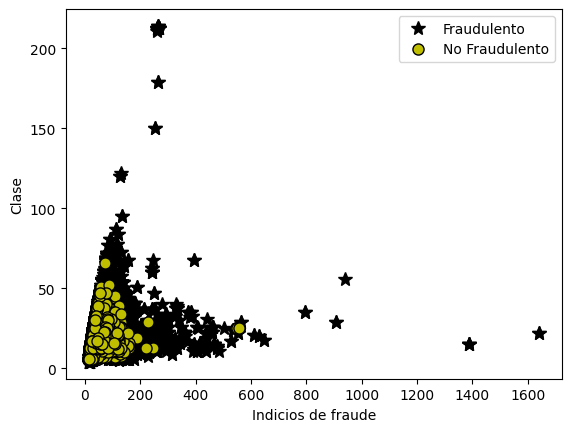

In [ ]:
plotData(x, y)
pyplot.xlabel('Indicios de fraude')
pyplot.ylabel('Clase')
pyplot.legend(['Fraudulento', 'No Fraudulento'])
pass

Se grafican los datos en dos grupos

In [ ]:
def funcionSigmoidea(z):
  z = np.array(z)
  z = float()
  g = 1/(1+np.exp(-z))
  return g

In [ ]:
def normalizarX(x):
  x_normalizada = []
  promedio = np.mean(x,axis=0)
  x = x.astype(float)
  desviacion_estandar = np.std(x,axis=0)
  for i in range(m_ejemplos):
    caracteristicas_x = []
    for j in range(x.shape[1]):
      if desviacion_estandar[j] != 0:
        caracteristicas_x.append((x[i,j]-promedio[j])/desviacion_estandar[j])
      else:
        caracteristicas_x.append(0)
    x_normalizada.append(caracteristicas_x)
  return x_normalizada, promedio, desviacion_estandar

Se normalizan los datos y se define la función sigmoide

In [ ]:
x_normalizada, promedio, desviacion_estandar = normalizarX(x)
x_normalizada = np.array(x_normalizada)
x = np.concatenate((np.ones((m_ejemplos,1)),x_normalizada),axis=1)

In [ ]:
def calcularCosto(x, y, theta):
  J = 0
  hipotesis = funcionSigmoidea(x.dot(theta.T))
  J = (1 / m_ejemplos) * np.sum(-y.dot(np.log(hipotesis)) - (1 - y).dot(np.log(1 - hipotesis)))

  return J

In [ ]:
def descensoGradiente(x,y,theta,alpha,n_iteraciones):
  historial_J = []
  theta = theta.copy()
  for i in range(n_iteraciones):
    hipotesis = funcionSigmoidea(x.dot(theta.T))
    theta = theta-(alpha/m_ejemplos)*(hipotesis-y).dot(x)
    historial_J.append(calcularCosto(x,y,theta))

  return theta, historial_J

In [ ]:
def hallarTheta():
  theta = np.zeros(x.shape[1])
  n_iteraciones = 1000
  alpha = 0.01
  theta, historial_J = descensoGradiente(x,y,theta,alpha,n_iteraciones)
  return theta, historial_J

In [ ]:
theta, historial_J = hallarTheta()
print("Las thetas encontradas son: ",theta)
print("El menor costo que se pudo determinar fue de: ",historial_J[-1])

Las thetas encontradas son:  [-0.0002573207760794583 1.2217419987126972 1.2034052877903008
 0.4916742647265581 1.0265095211469093 -0.5142465363755072
 0.7049333109025905 1.4695982689121168 0.8554028764704649
 1.1652385199703967 0.20913761077240342 0.13998139129605058
 0.13594849701776748 1.2044622755584118 0.13426577002092785
 0.4649987797094054 0.05291786207920775 0.5169101765974353
 0.11561557086502068 -2.2228072213465686 0.7810359762949663
 0.3591206056604616 0.5756608288201399 1.7829358897688028
 1.1259751816663452 0.09492312769188616 0.04332127787811341
 0.41293715924230157 1.0401724825477363 0.6406968175135443
 0.5585792784168463 1.046544268178302 0.09795160928102621
 0.5056743635152189 -0.020707528731131318 -0.10846304894463915
 0.28744262153889766 0.9515369479341506 0.060689188287778674
 -0.17957573742202518 1.1264912205949074 0.38185650127931414
 1.0123310865546504 0.6335946905261515 1.0726270383062473
 0.8441222964467028 0.9798784381001894 0.9881497105772518
 1.68643321586998

Text(0, 0.5, 'Costo J')

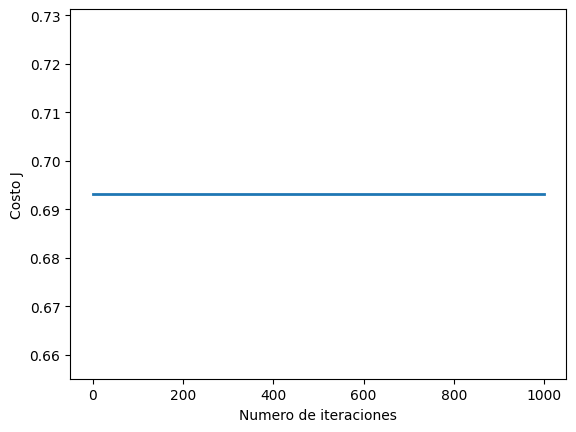

In [ ]:
pyplot.plot(np.arange(len(historial_J)), historial_J, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

In [ ]:
def predecir(theta):
  y_predecir = np.column_stack((data[15000:,2:77],data[15000:,79:86]))
  m_predecir = y_predecir.shape[0]
  columna_zeros = np.zeros((m_predecir,1))
  y_predecir = np.append(columna_zeros,y_predecir,axis = 1)
  p = np.round(funcionSigmoidea(y_predecir.dot(theta.T)))
  return p

In [ ]:
p = predecir(theta)
y_predecir = data[15000:,86]
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p==y_predecir) * 100))

Precisión de entrenamiento: 50.21 %
